Hello again! If you are here, you know what you probably know what you are getting into - another data analysis project!!! Yay!!!This time, we are going to analyze some life expectancy and GDP values of different countries. Interesting... 

But before that, we should load in some libraries that will help us with future analysis and load in the data, so let's jump right into that! (NOTE - if you get any error called "ModuleNotFoundError", try installing the module through bash. If you don't know how, I suggest you google it. Also, if you use VSCode to look at it, for some reason matplotlib doesn't work with VSCode anymore, I didn't dig into it enough to understand why exactly but I know it doesn't work anymore.)

In [10]:
# Importing some libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #Hehe sns more like Sans Understale hehe nice joke me

# Now, using pandas, we will load the csv file into a dataframe and print the first 5 rows of it just to see how it looks.
# We will also print some information just to check that everything is fine with the dataset and move on.
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Now, after importing the data into a dataframe and looking at a small part of it, let's check some basic stuff about the dataset - What countires are in the dataframe? What are the average and the median life expectancy at birth in the dataframe and in each country? What are the average and median GDP in the dataframe and in each country? For all of those questions we will get answers.

In [38]:
print('The unique countries in the dataset are:')
print(df.Country.unique())

print('The average life expectancy at birth of all of the dataframe is: ' + str((np.mean(df['Life expectancy at birth (years)']))))
print('The median life expectancy at birth of all of the dataframe is: ' + str(np.median(df['Life expectancy at birth (years)'])))
print('The average GDP of all of the dataframe is: ' + str(np.mean(df.GDP)))
print('The median GDP of all of the dataframe is: ' + str(np.median(df.GDP)))

def average_life_expectancy_finder(country):
    average_life_expectancy = np.mean(df['Life expectancy at birth (years)'][df.Country == country])
    return average_life_expectancy

def median_life_expectancy_finder(country):
    median_life_expectancy = np.median(df['Life expectancy at birth (years)'][df.Country == country])
    return median_life_expectancy

def average_gdp_finder(country):
    average_gdp = np.mean(df.GDP[df.Country == country])
    return average_gdp

def median_gdp_finder(country):
    median_gdp = np.median(df.GDP[df.Country == country])
    return median_gdp

for country in df.Country.unique():
    average_life_expectancy = average_life_expectancy_finder(country)
    median_life_expectancy = median_life_expectancy_finder(country)
    average_gdp = average_gdp_finder(country)
    median_gdp = median_gdp_finder(country)
    print(f'Information about {country}: the average life expectancy is {average_life_expectancy}, the median life expectancy is {median_life_expectancy}, the average GDP is {average_gdp}, and the median GDP is {median_gdp}.\n')


The unique countries in the dataset are:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
The average life expectancy at birth of all of the dataframe is: 72.78958333333334
The median life expectancy at birth of all of the dataframe is: 76.75
The average GDP of all of the dataframe is: 3880498570768.396
The median GDP of all of the dataframe is: 1280220000000.0
Information about Chile: the average life expectancy is 78.94375, the median life expectancy is 79.0, the average GDP is 169788845015.3125, and the median GDP is 172997500000.0.

Information about China: the average life expectancy is 74.26249999999999, the median life expectancy is 74.45, the average GDP is 4957713750000.0, and the median GDP is 4075195000000.0.

Information about Germany: the average life expectancy is 79.65625, the median life expectancy is 79.85, the average GDP is 3094775625000.0, and the median GDP is 3396350000000.0.

Information about Mexico: the average life expectancy is 75.71

Great! after getting to know a little bit more about the data that we got, we can start visualising things! Lets start with somethings simple - showing the life expectancy and GDP over the years for each country.

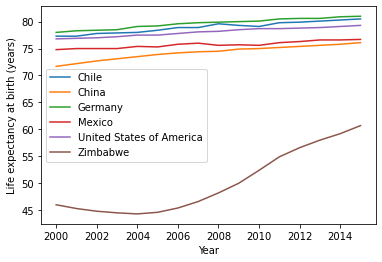

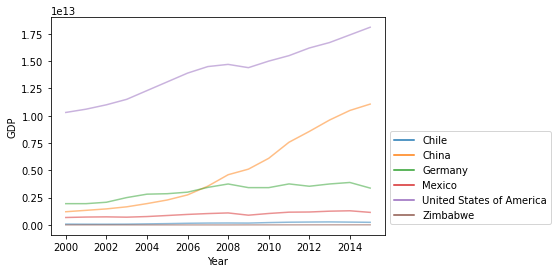

In [68]:
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.legend(loc='best')
plt.show()
plt.clf() # This is so the next thing we visualize won't get in the same figure as this

sns.lineplot(data=df, x='Year', y='GDP', hue='Country', alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

Great! Now, we can see clearly which country leads in each category, or at least see approximetly what are the values, but maybe there are other ways that can let us look at the data differently? Lets try and visualise the data in different ways.

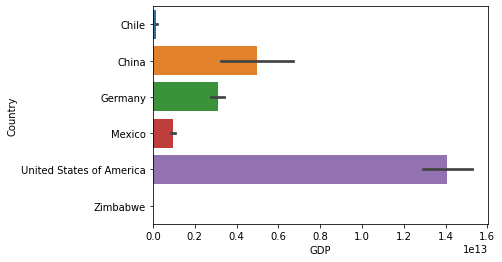

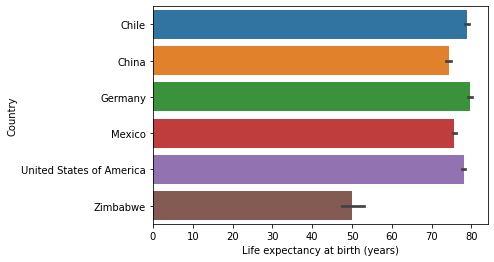

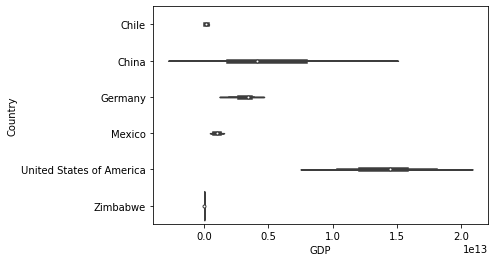

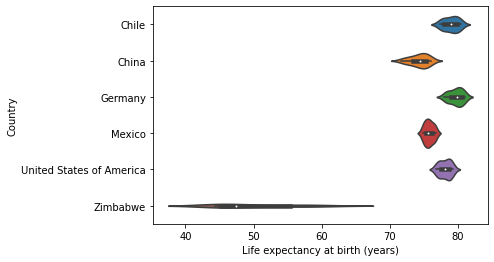

<Figure size 432x288 with 0 Axes>

In [94]:
sns.barplot(data=df, x='GDP', y='Country')
plt.show()
plt.clf()

sns.barplot(data=df, x='Life expectancy at birth (years)', y='Country')
plt.show()
plt.clf()

sns.violinplot(data=df, x='GDP', y='Country')
plt.show()
plt.clf()

sns.violinplot(data=df, x='Life expectancy at birth (years)', y='Country')
plt.show()
plt.clf()

Nice! Now, we can check if there is correlation between the GDP and the Life expectancy. We will check this with the whole dataset, then seperate it country by country just because we can :) 

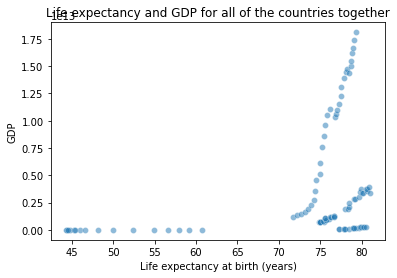

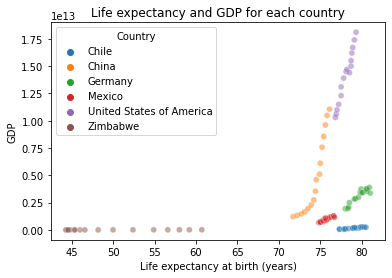

<Figure size 432x288 with 0 Axes>

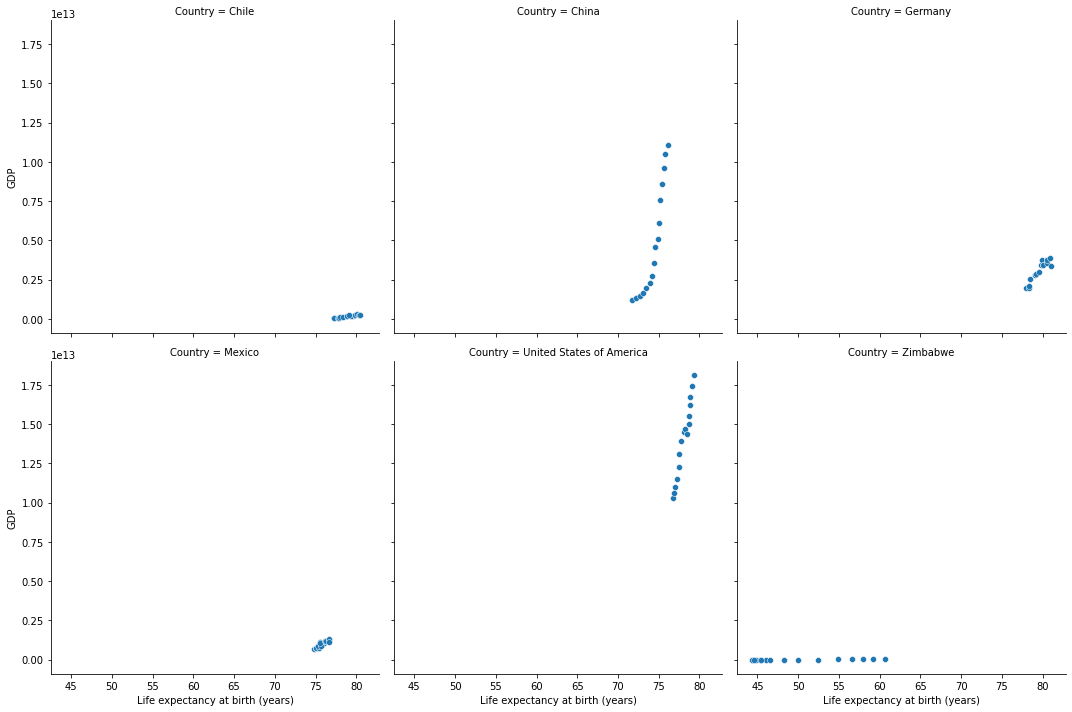

In [86]:
sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='GDP', alpha=0.5)
plt.title('Life expectancy and GDP for all of the countries together')
plt.show()
plt.clf()

sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='GDP', alpha=0.5, hue='Country')
plt.title('Life expectancy and GDP for each country')
plt.show()
plt.clf()

sns.relplot(data=df, x='Life expectancy at birth (years)', y='GDP', col='Country', col_wrap=3)
plt.show()

Conclusions:

* When looking at the life expectancy at birth, we can see that all of the countries besides Zimbabwe are pretty close, but when looking at the GDP, we can see that the US is leading by far, with China catching up over time.
* We can also speculate that there is a positive correlation between the life expectancy and the GDP, yet a minor one.
* When looking at the average and median life expectancy, they are both around 75, besides Zimbabwe which has WAY lower stats compared to the other countries with an average of 50 and median of 47.
* When looking at the average and median GDP, there isn't a clear middle point for the countries because the differences between every country is massive.

That's all for this time! Thank you for taking your time to read this!